# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

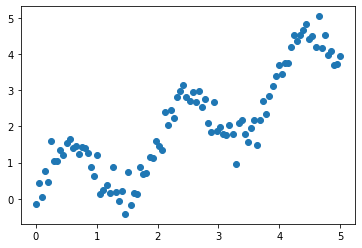

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5906196275189347


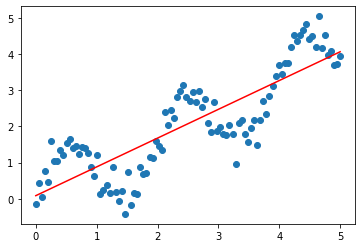

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 6)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

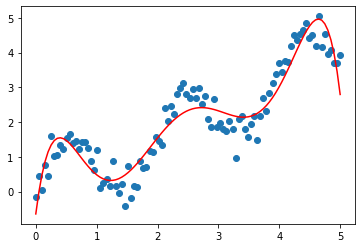

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 13.81111125 -29.08800491  24.03988178  -9.15677041   1.62827596
  -0.10936222]
interception:  -0.6410427176392335


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([-0.64104272, -0.01467045,  0.48107245,  0.86270226,  1.14543102,
        1.34322742,  1.46887645,  1.53403774,  1.54930253,  1.52424945,
        1.46749889,  1.38676608,  1.28891294,  1.17999851,  1.06532815,
        0.94950142,  0.83645864,  0.72952614,  0.63146022,  0.5444898 ,
        0.47035775,  0.41036091,  0.36538884,  0.33596123,  0.32226399,
        0.32418409,  0.34134301,  0.373129  ,  0.41872787,  0.47715267,
        0.54727188,  0.62783641,  0.71750524,  0.81486979,  0.91847696,
        1.02685084,  1.13851317,  1.25200244,  1.36589173,  1.47880518,
        1.58943325,  1.69654656,  1.79900852,  1.89578656,  1.98596217,
        2.06873952,  2.14345285,  2.2095725 ,  2.26670968,  2.31461988,
        2.35320506,  2.38251441,  2.40274392,  2.41423457,  2.41746925,
        2.41306836,  2.40178408,  2.38449338,  2.36218971,  2.33597333,
        2.30704043,  2.27667084,  2.24621452,  2.2170767 ,  2.19070167,
        2.16855541,  2.1521067 ,  2.14280715,  2.14206971,  2.15

In [15]:
regr_poly.predict(X_poly)

array([-0.64104272, -0.01467045,  0.48107245,  0.86270226,  1.14543102,
        1.34322742,  1.46887645,  1.53403774,  1.54930253,  1.52424945,
        1.46749889,  1.38676608,  1.28891294,  1.17999851,  1.06532815,
        0.94950142,  0.83645864,  0.72952614,  0.63146022,  0.5444898 ,
        0.47035775,  0.41036091,  0.36538884,  0.33596123,  0.32226399,
        0.32418409,  0.34134301,  0.373129  ,  0.41872787,  0.47715267,
        0.54727188,  0.62783641,  0.71750524,  0.81486979,  0.91847696,
        1.02685084,  1.13851317,  1.25200244,  1.36589173,  1.47880518,
        1.58943325,  1.69654656,  1.79900852,  1.89578656,  1.98596217,
        2.06873952,  2.14345285,  2.2095725 ,  2.26670968,  2.31461988,
        2.35320506,  2.38251441,  2.40274392,  2.41423457,  2.41746925,
        2.41306836,  2.40178408,  2.38449338,  2.36218971,  2.33597333,
        2.30704043,  2.27667084,  2.24621452,  2.2170767 ,  2.19070167,
        2.16855541,  2.1521067 ,  2.14280715,  2.14206971,  2.15

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

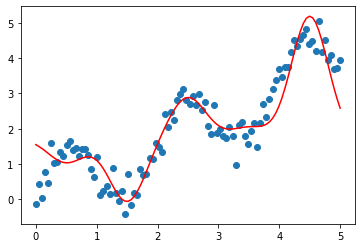

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.68015486 -1.78570121  1.17614169  0.32099395  3.47645353]
interception:  1.7169253200107837


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

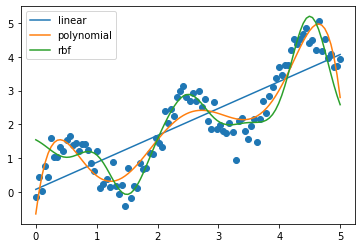

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5906196275189347


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.20419069354430305


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2519348073528989
